In [121]:
import pandas as pd
import re
!pip install transformers torch pandas

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
667153.05s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


In [ ]:

file_path = "Sentiment Data Collection Sheet.xlsx"

all_sheets = pd.read_excel(file_path, sheet_name=None)

display("Sheet names:", list(all_sheets.keys()))

'Sheet names:'

['Course #1 2410',
 'Course #2 2410',
 'Course #3 2410',
 'Course #4 2410',
 'Course #5 2410',
 'Course #6 2410',
 'Course #7 2410',
 'Course #8 2410',
 'Course #9 2410',
 'Course #10 2410',
 'Course #11 2410',
 'Course #12 2410',
 'Course #13 2410',
 'Course #14 2410',
 'Course #15 2410',
 'Course #16 2410',
 'Course #17 2380',
 'Course #18 2380',
 'Course #19 2380',
 'Course #20 2380',
 'Course #21 2310 ',
 'Course #22 2280',
 'Course #23 2280',
 'Course #24 2280',
 'Course #25 2280',
 'Course #26 2280',
 'Course #27 2280',
 'Course #28 2280',
 'Course #29 2280',
 'Course #30 2280',
 'Course #31 2280',
 'Course #32 2280',
 'Course #33 2280',
 'Course #34 2280',
 'Course #35 2280',
 'Course #36 2210',
 'Course #37 2210',
 'Course #38 2210',
 'Course #39 2210',
 'Course #40 2210',
 'Course #41 2210',
 'Course #42 2210',
 'Course #43 2210',
 'Course #44 2210',
 'Course #45 2210',
 'Course #46 2210',
 'Course #47 2210',
 'Course #48 2210',
 'Course #49 2210',
 'Course #50 2210',
 'Course

In [123]:

def parse_semester(sheet_name):
    match = re.match(r'Course #\d+ (\d{2})(\d{2})', sheet_name)
    if match:
        year = 2000 + int(match.group(1)) # e.g 24 -> 2024
        semester_code = int(match.group(2))

        if semester_code == 10:
            term = 'Spring'+ " " +str(year)
            return pd.Timestamp(f"{year}-02-01"), term # Fall semester
        elif semester_code == 80:
            term = 'Fall'+ " " +str(year)
            return pd.Timestamp(f"{year}-09-01"), term # Spring semester
        else:
            return pd.NaT  # Invalid semester code
    return pd.NaT  # Invalid sheet name

df_with_semester = []

for sheet_name, df in all_sheets.items():
    df['Date'], df['Term']= parse_semester(sheet_name)
    df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')
    df['course_semester'] = sheet_name
    df_with_semester.append(df)

# Concatenate all the dataframes
merged_data = pd.concat(df_with_semester, ignore_index=True)

# Sort the data by the 'Semester' column

merged_data = merged_data.sort_values(by='Date')

In [124]:
# Reset the index for cleanliness

merged_data = merged_data.reset_index(drop=True)

print(f"\nPrinting sum of null values for each column: \n", merged_data.isnull().sum())

# Data preprocessing

def preprocess_text(text):

    # return empty string if text is NaN or empty values
    if pd.isna(text) or text == '':
        return ''

    text = re.sub(r'redacted|a-zredacted|redacteda-z|\[redacted\]|\{redacted\}|\{redacted\]|\[redacted\}', '', text, flags=re.IGNORECASE)
    text = text.lower()

    # remove the term "[REDACTED]"

    # Remove special characters and numbers
    text = re.sub(r'[^a-z\s]', '', text)

    # Optional: Remove extra whitespace if necessary
    text = re.sub(r'\s+', ' ', text).strip()
    return text




Printing sum of null values for each column: 
 I could have done the following to improve my performance in this course:               142
Please identify what you consider to be the strengths of this course.                    83
Please identify areas where you think this course could be improved.                     71
What advice would you give to another student who is considering taking this course?     42
What suggestions do you have to improve the instructor's effectiveness?                 358
Date                                                                                      0
Term                                                                                      0
course_semester                                                                           0
dtype: int64


In [125]:
# Apply preprocess_text to all columns except "Combined Feedback"

feeback_columns = [

    "I could have done the following to improve my performance in this course:",
    "Please identify what you consider to be the strengths of this course.",
    "Please identify areas where you think this course could be improved.",
    "What advice would you give to another student who is considering taking this course?",
    "What suggestions do you have to improve the instructor's effectiveness?"
]

# Apply preprocessing to each feedback column
for column in feeback_columns:
    merged_data[column] = merged_data[column].apply(preprocess_text)

merged_data.to_excel('output_preprocessed.xlsx', index=False)
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691 entries, 0 to 690
Data columns (total 8 columns):
 #   Column                                                                                Non-Null Count  Dtype 
---  ------                                                                                --------------  ----- 
 0   I could have done the following to improve my performance in this course:             691 non-null    object
 1   Please identify what you consider to be the strengths of this course.                 691 non-null    object
 2   Please identify areas where you think this course could be improved.                  691 non-null    object
 3   What advice would you give to another student who is considering taking this course?  691 non-null    object
 4   What suggestions do you have to improve the instructor's effectiveness?               691 non-null    object
 5   Date                                                                                  691 non

In [126]:
# Load the cleaned data
merged_data = pd.read_excel('output_preprocessed.xlsx')

# Verify the structure
print(merged_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691 entries, 0 to 690
Data columns (total 8 columns):
 #   Column                                                                                Non-Null Count  Dtype 
---  ------                                                                                --------------  ----- 
 0   I could have done the following to improve my performance in this course:             547 non-null    object
 1   Please identify what you consider to be the strengths of this course.                 607 non-null    object
 2   Please identify areas where you think this course could be improved.                  620 non-null    object
 3   What advice would you give to another student who is considering taking this course?  649 non-null    object
 4   What suggestions do you have to improve the instructor's effectiveness?               332 non-null    object
 5   Date                                                                                  691 non

In [127]:
from transformers import pipeline

# Load the emotion detection pipeline
emotion_analyzer = pipeline(
    "text-classification",
    model="j-hartmann/emotion-english-distilroberta-base",
    tokenizer="j-hartmann/emotion-english-distilroberta-base",
    return_all_scores=True  # Get scores for all emotions
)

Device set to use mps:0
/Users/puskarjoshi/Documents/Dev/Student Sentiment Analysis/env/lib/python3.11/site-packages/transformers/pipelines/text_classification.py:106: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [128]:
def analyze_emotions(text):
  if not text or pd.isna(text) or text.strip() == '':
    return {'label': 'neutral', 'score': 0.0, 'distribution': {'anger': 0.0, 'disgust': 0.0, 'fear': 0.0, 'joy': 0.0, 'sadness': 0.0, 'surprise':0.0}}
  try:
    # Truncate to 512 tokens to fit model limit
    result = emotion_analyzer(text[:512])

    # extract the dominant emotion
    dominant_emotion = max(result[0], key=lambda x: x['score'])

    # extract the full distribution
    emotion_distribution = {emotion['label']: emotion['score'] for emotion in result[0]}
    return {'label': dominant_emotion['label'], 'score': dominant_emotion['score'], 'distribution': emotion_distribution}

  except Exception as e:

    print(f"Error analyzing emotions: {e}")
    return {'label': 'neutral', 'score': 0.0, 'distribution': {'anger': 0.0, 'disgust': 0.0, 'fear': 0.0, 'joy': 0.0, 'sadness': 0.0, 'surprise':0.0}}

In [129]:
# Apply emotion detection to each feedback column
feedback_columns = [
    "I could have done the following to improve my performance in this course:",
    "Please identify what you consider to be the strengths of this course.",
    "Please identify areas where you think this course could be improved.",
    "What advice would you give to another student who is considering taking this course?",
    "What suggestions do you have to improve the instructor's effectiveness?"
]


# Create new columns for emotion labels, scores, and distributions
for column in feedback_columns:

    # Apply emotion analysis
    emotion_results = merged_data[column].apply(analyze_emotions)

    # Extract label, score, and distribution into separate columns
    merged_data[f'{column}_emotion'] = emotion_results.apply(lambda x: x['label'])
    merged_data[f'{column}_emotion_score'] = emotion_results.apply(lambda x: x['score'])

    # Extract each emotion's score into its own column
    for emotion in ['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'surprise']:
        merged_data[f'{column}_{emotion}_score'] = emotion_results.apply(lambda x: x['distribution'].get(emotion, 0.0))

In [130]:
emotion_columns = [col for col in merged_data.columns if '_emotion' in col or '_emotion_score' in col or '_joy_score' in col or 'anger' in col or 'disgust' in col or 'fear' in col or 'joy' in col or 'neutral' in col or 'sadness' in col or 'surprise' in col]
display(merged_data[emotion_columns].head())


,I could have done the following to improve my performance in this course:_emotion,I could have done the following to improve my performance in this course:_emotion_score,I could have done the following to improve my performance in this course:_anger_score,I could have done the following to improve my performance in this course:_disgust_score,I could have done the following to improve my performance in this course:_fear_score,I could have done the following to improve my performance in this course:_joy_score,I could have done the following to improve my performance in this course:_neutral_score,I could have done the following to improve my performance in this course:_sadness_score,I could have done the following to improve my performance in this course:_surprise_score,Please identify what you consider to be the strengths of this course._emotion,...,What advice would you give to another student who is considering taking this course?_surprise_score,What suggestions do you have to improve the instructor's effectiveness?_emotion,What suggestions do you have to improve the instructor's effectiveness?_emotion_score,What suggestions do you have to improve the instructor's effectiveness?_anger_score,What suggestions do you have to improve the instructor's effectiveness?_disgust_score,What suggestions do you have to improve the instructor's effectiveness?_fear_score,What suggestions do you have to improve the instructor's effectiveness?_joy_score,What suggestions do you have to improve the instructor's effectiveness?_neutral_score,What suggestions do you have to improve the instructor's effectiveness?_sadness_score,What suggestions do you have to improve the instructor's effectiveness?_surprise_score
0,neutral,0.790397,0.040875,0.021711,0.034129,0.010446,0.790397,0.028790,0.073652,neutral,...,0.000000,neutral,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,neutral,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,neutral,...,0.175192,neutral,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,neutral,0.968366,0.005301,0.002564,0.001732,0.008285,0.968366,0.009312,0.004439,neutral,...,0.005688,joy,0.934495,0.004168,0.002729,0.001260,0.934495,0.014150,0.003020,0.040180
3,anger,0.472897,0.472897,0.002432,0.035101,0.006123,0.025169,0.450775,0.007503,neutral,...,0.087670,neutral,0.671957,0.009578,0.004374,0.012211,0.020985,0.671957,0.232444,0.048452
4,sadness,0.853538,0.082063,0.001622,0.021050,0.004957,0.012779,0.853538,0.023991,neutral,...,0.005017,joy,0.817340,0.037986,0.001661,0.000564,0.817340,0.006275,0.119895,0.016279


In [131]:
merged_data.to_excel('EmotionsAndScores.xlsx', index=False)
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691 entries, 0 to 690
Data columns (total 53 columns):
 #   Column                                                                                               Non-Null Count  Dtype  
---  ------                                                                                               --------------  -----  
 0   I could have done the following to improve my performance in this course:                            547 non-null    object 
 1   Please identify what you consider to be the strengths of this course.                                607 non-null    object 
 2   Please identify areas where you think this course could be improved.                                 620 non-null    object 
 3   What advice would you give to another student who is considering taking this course?                 649 non-null    object 
 4   What suggestions do you have to improve the instructor's effectiveness?                              332 non-n

In [132]:
import matplotlib.pyplot as plt
!pip install seaborn
import seaborn as sns

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
667194.91s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


In [133]:
# Identify the columns containing the dominant emotion labels for each feedback question.


# List of columns containing the dominant emotion labels
emotion_columns = [
    "I could have done the following to improve my performance in this course:_emotion",
    "Please identify what you consider to be the strengths of this course._emotion",
    "Please identify areas where you think this course could be improved._emotion",
    "What advice would you give to another student who is considering taking this course?_emotion",
    "What suggestions do you have to improve the instructor's effectiveness?_emotion"
]

# Shortened names for plotting (optional)
short_names = [
    "Performance Improvement",
    "Course Strengths",
    "Areas to Improve",
    "Advice to Students",
    "Instructor Effectiveness"
]

/var/folders/k4/gqs31md50gl9sl_hnj9bqcvr0000gn/T/ipykernel_73793/3180694686.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=emotion_counts.values, y=emotion_counts.index, palette="viridis")
/var/folders/k4/gqs31md50gl9sl_hnj9bqcvr0000gn/T/ipykernel_73793/3180694686.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=emotion_counts.values, y=emotion_counts.index, palette="viridis")
/var/folders/k4/gqs31md50gl9sl_hnj9bqcvr0000gn/T/ipykernel_73793/3180694686.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=emotion_counts.values,

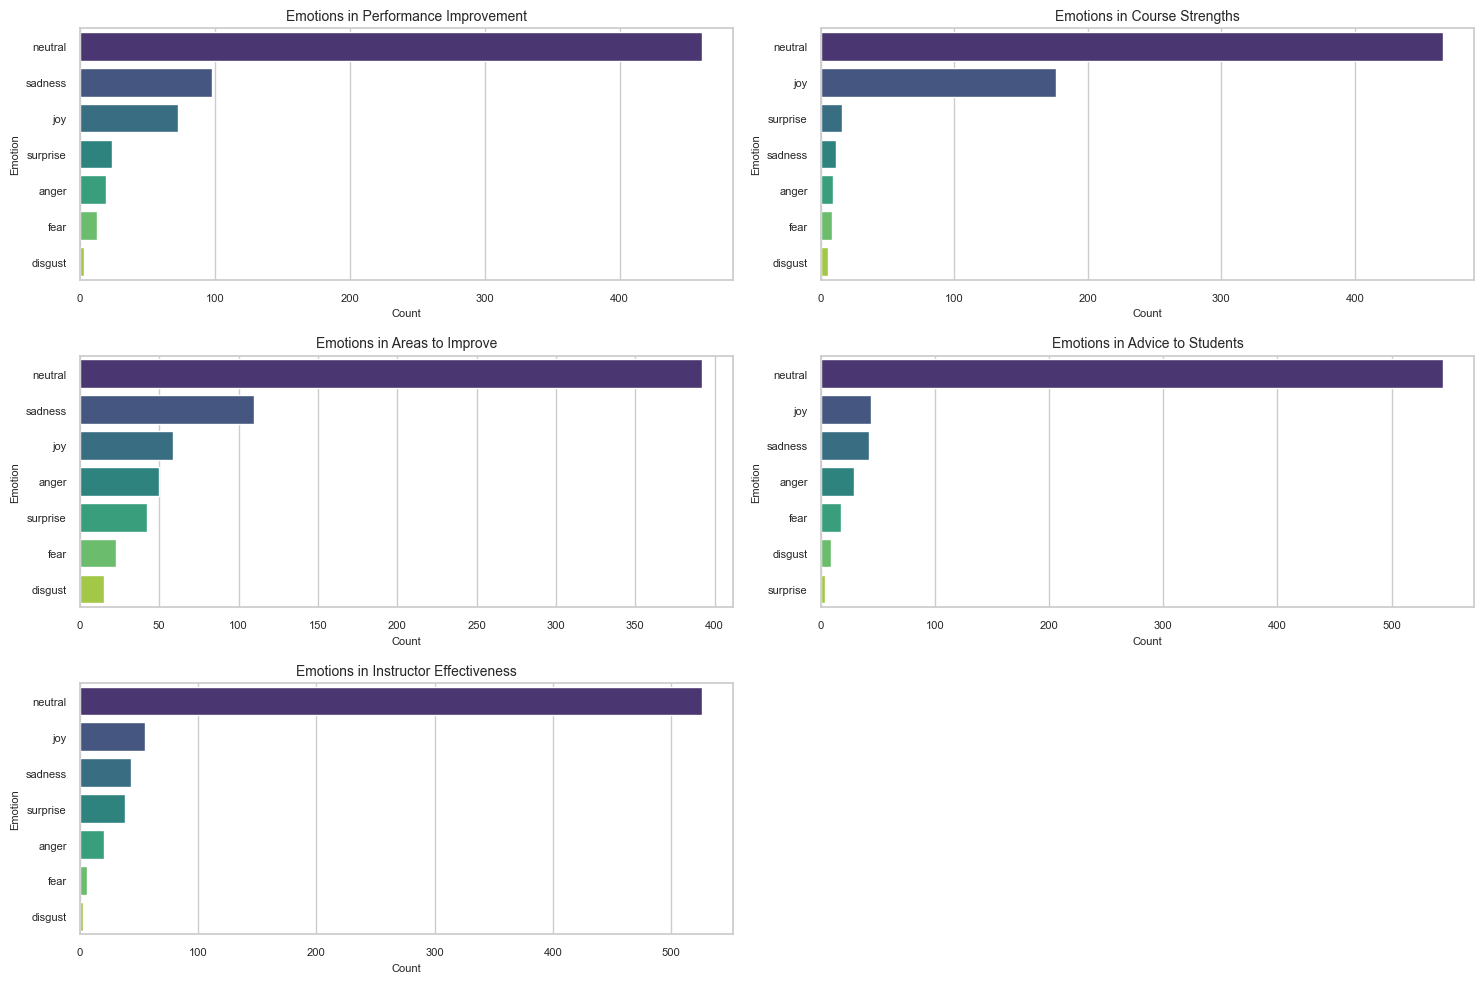

In [134]:
# Creating a bar chart for each feedback question showing the frequency of each emotion

# Set up the plotting style
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))

# Create subplots for each feedback question
for idx, (col, short_name) in enumerate(zip(emotion_columns, short_names)):
    plt.subplot(3, 2, idx + 1)
    # Count the frequency of each emotion
    emotion_counts = merged_data[col].value_counts()
    # Plot a bar chart
    sns.barplot(x=emotion_counts.values, y=emotion_counts.index, palette="viridis")
    plt.title(f"Emotions in {short_name}", fontsize=10)
    plt.xlabel("Count", fontsize=8)
    plt.ylabel("Emotion", fontsize=8)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)

plt.tight_layout()
plt.show()

In [135]:
# Apply preprocess_text to all columns except "Combined Feedback"

merged_data = pd.read_excel('output_preprocessed.xlsx')
display(merged_data)

feedback_columns = [

    "I could have done the following to improve my performance in this course:",
    "Please identify what you consider to be the strengths of this course.",
    "Please identify areas where you think this course could be improved.",
    "What advice would you give to another student who is considering taking this course?",
    "What suggestions do you have to improve the instructor's effectiveness?"
]

,I could have done the following to improve my performance in this course:,Please identify what you consider to be the strengths of this course.,Please identify areas where you think this course could be improved.,What advice would you give to another student who is considering taking this course?,What suggestions do you have to improve the instructor's effectiveness?,Date,Term,course_semester
0,everything,NaN,NaN,NaN,NaN,2021-09-01,Fall 2021,Course #66 2180
1,NaN,NaN,the content was very dry and boring and we had...,take it freshman year i didnt find this class ...,NaN,2021-09-01,Fall 2021,Course #60 2180
2,take a bit more time to study and get assignme...,the personality of the instructor the instruct...,better communication between instructors and s...,do your assignments and dont be lazy about them,the instructors funny and makes the class time...,2021-09-01,Fall 2021,Course #61 2180
3,tried harder at the assignments and asked for ...,teaches different parts of microsoft office ve...,i feel like it is a bit too simplistic for man...,go to class its important and do all of the ho...,more instructions on homework and make assignm...,2021-09-01,Fall 2021,Course #61 2180
4,i had trouble with some of the instructions be...,the quizzes,the activities maybe not as detailed or just a...,make sure to stay on top of everything and do ...,i love the way the instructor teaches it can b...,2021-09-01,Fall 2021,Course #61 2180
...,...,...,...,...,...,...,...,...
686,ask questions,the course has good work that is fairly easy b...,not much instruction after the th week,dont take this professor,NaN,2024-02-01,Spring 2024,Course #11 2410
687,do it more before the end of the period,we have the same assignments every week,the assignments were extremely difficult and w...,good luck this is pointless,NaN,2024-02-01,Spring 2024,Course #11 2410
688,not procrastinated,NaN,NaN,NaN,NaN,2024-02-01,Spring 2024,Course #11 2410
689,nothing,nothing,the course is outdated according to this class...,do the work,NaN,2024-02-01,Spring 2024,Course #10 2410


In [136]:
# fill na for empty columns
merged_data[feedback_columns] = merged_data[feedback_columns].fillna('')

# merge the feedback columns into a single column
merged_data['Combined_Feedback'] = merged_data[feedback_columns].apply(lambda row: '.'.join(row.dropna().astype(str)), axis=1)

# verify the merged column
display(merged_data)

,I could have done the following to improve my performance in this course:,Please identify what you consider to be the strengths of this course.,Please identify areas where you think this course could be improved.,What advice would you give to another student who is considering taking this course?,What suggestions do you have to improve the instructor's effectiveness?,Date,Term,course_semester,Combined_Feedback
0,everything,,,,,2021-09-01,Fall 2021,Course #66 2180,everything....
1,,,the content was very dry and boring and we had...,take it freshman year i didnt find this class ...,,2021-09-01,Fall 2021,Course #60 2180,..the content was very dry and boring and we h...
2,take a bit more time to study and get assignme...,the personality of the instructor the instruct...,better communication between instructors and s...,do your assignments and dont be lazy about them,the instructors funny and makes the class time...,2021-09-01,Fall 2021,Course #61 2180,take a bit more time to study and get assignme...
3,tried harder at the assignments and asked for ...,teaches different parts of microsoft office ve...,i feel like it is a bit too simplistic for man...,go to class its important and do all of the ho...,more instructions on homework and make assignm...,2021-09-01,Fall 2021,Course #61 2180,tried harder at the assignments and asked for ...
4,i had trouble with some of the instructions be...,the quizzes,the activities maybe not as detailed or just a...,make sure to stay on top of everything and do ...,i love the way the instructor teaches it can b...,2021-09-01,Fall 2021,Course #61 2180,i had trouble with some of the instructions be...
...,...,...,...,...,...,...,...,...,...
686,ask questions,the course has good work that is fairly easy b...,not much instruction after the th week,dont take this professor,,2024-02-01,Spring 2024,Course #11 2410,ask questions.the course has good work that is...
687,do it more before the end of the period,we have the same assignments every week,the assignments were extremely difficult and w...,good luck this is pointless,,2024-02-01,Spring 2024,Course #11 2410,do it more before the end of the period.we hav...
688,not procrastinated,,,,,2024-02-01,Spring 2024,Course #11 2410,not procrastinated....
689,nothing,nothing,the course is outdated according to this class...,do the work,,2024-02-01,Spring 2024,Course #10 2410,nothing.nothing.the course is outdated accordi...


In [137]:
from transformers import pipeline

# Load the emotion detection pipeline
emotion_analyzer = pipeline(
    "text-classification",
    model="j-hartmann/emotion-english-distilroberta-base",
    tokenizer="j-hartmann/emotion-english-distilroberta-base",
    return_all_scores=True  # Get scores for all emotions
)

Device set to use mps:0
/Users/puskarjoshi/Documents/Dev/Student Sentiment Analysis/env/lib/python3.11/site-packages/transformers/pipelines/text_classification.py:106: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [138]:
def analyze_emotions(text):
  if not text or pd.isna(text) or text.strip() == '':
    return {'label': 'neutral', 'score': 0.0, 'distribution': {'anger': 0.0, 'disgust': 0.0, 'fear': 0.0, 'joy': 0.0, 'sadness': 0.0, 'surprise':0.0}}
  try:
    # Truncate to 512 tokens to fit model limit
    result = emotion_analyzer(text[:512])

    # extract the dominant emotion
    dominant_emotion = max(result[0], key=lambda x: x['score'])

    # extract the full distribution
    emotion_distribution = {emotion['label']: emotion['score'] for emotion in result[0]}
    return {'label': dominant_emotion['label'], 'score': dominant_emotion['score'], 'distribution': emotion_distribution}

  except Exception as e:

    print(f"Error analyzing emotions: {e}")
    return {'label': 'neutral', 'score': 0.0, 'distribution': {'anger': 0.0, 'disgust': 0.0, 'fear': 0.0, 'joy': 0.0, 'sadness': 0.0, 'surprise':0.0}}

In [139]:
emotion_results = merged_data['Combined_Feedback'].apply(analyze_emotions)
merged_data['Combined_Emotion'] = emotion_results.apply(lambda x: x['label'])
merged_data['Combined_Emotion_Score'] = emotion_results.apply(lambda x: x['score'])

In [140]:
# Display merged_data with emotion_columns
emotion_columns = ['Combined_Feedback', 'Combined_Emotion', 'Combined_Emotion_Score']
display(merged_data)
merged_data.to_excel('Combined Emotion For Each Student.xlsx', index=False)


,I could have done the following to improve my performance in this course:,Please identify what you consider to be the strengths of this course.,Please identify areas where you think this course could be improved.,What advice would you give to another student who is considering taking this course?,What suggestions do you have to improve the instructor's effectiveness?,Date,Term,course_semester,Combined_Feedback,Combined_Emotion,Combined_Emotion_Score
0,everything,,,,,2021-09-01,Fall 2021,Course #66 2180,everything....,neutral,0.751168
1,,,the content was very dry and boring and we had...,take it freshman year i didnt find this class ...,,2021-09-01,Fall 2021,Course #60 2180,..the content was very dry and boring and we h...,sadness,0.868021
2,take a bit more time to study and get assignme...,the personality of the instructor the instruct...,better communication between instructors and s...,do your assignments and dont be lazy about them,the instructors funny and makes the class time...,2021-09-01,Fall 2021,Course #61 2180,take a bit more time to study and get assignme...,joy,0.884459
3,tried harder at the assignments and asked for ...,teaches different parts of microsoft office ve...,i feel like it is a bit too simplistic for man...,go to class its important and do all of the ho...,more instructions on homework and make assignm...,2021-09-01,Fall 2021,Course #61 2180,tried harder at the assignments and asked for ...,sadness,0.672566
4,i had trouble with some of the instructions be...,the quizzes,the activities maybe not as detailed or just a...,make sure to stay on top of everything and do ...,i love the way the instructor teaches it can b...,2021-09-01,Fall 2021,Course #61 2180,i had trouble with some of the instructions be...,sadness,0.505012
...,...,...,...,...,...,...,...,...,...,...,...
686,ask questions,the course has good work that is fairly easy b...,not much instruction after the th week,dont take this professor,,2024-02-01,Spring 2024,Course #11 2410,ask questions.the course has good work that is...,sadness,0.579571
687,do it more before the end of the period,we have the same assignments every week,the assignments were extremely difficult and w...,good luck this is pointless,,2024-02-01,Spring 2024,Course #11 2410,do it more before the end of the period.we hav...,sadness,0.834311
688,not procrastinated,,,,,2024-02-01,Spring 2024,Course #11 2410,not procrastinated....,neutral,0.608038
689,nothing,nothing,the course is outdated according to this class...,do the work,,2024-02-01,Spring 2024,Course #10 2410,nothing.nothing.the course is outdated accordi...,neutral,0.629672


Terms: ['Fall 2021', 'Spring 2022', 'Fall 2022', 'Spring 2023', 'Fall 2023', 'Spring 2024']


,Term,Emotion,Emotion_Count,Total_Emotions_Count,Emotion_Percentage
0,Fall 2021,anger,4,114,3.508772
1,Spring 2022,anger,8,166,4.819277
2,Fall 2022,anger,29,245,11.836735
3,Spring 2023,anger,1,18,5.555556
4,Fall 2023,anger,0,55,0.000000
5,Spring 2024,anger,8,93,8.602151
6,Fall 2021,disgust,0,114,0.000000
7,Spring 2022,disgust,0,166,0.000000
8,Fall 2022,disgust,2,245,0.816327
9,Spring 2023,disgust,0,18,0.000000


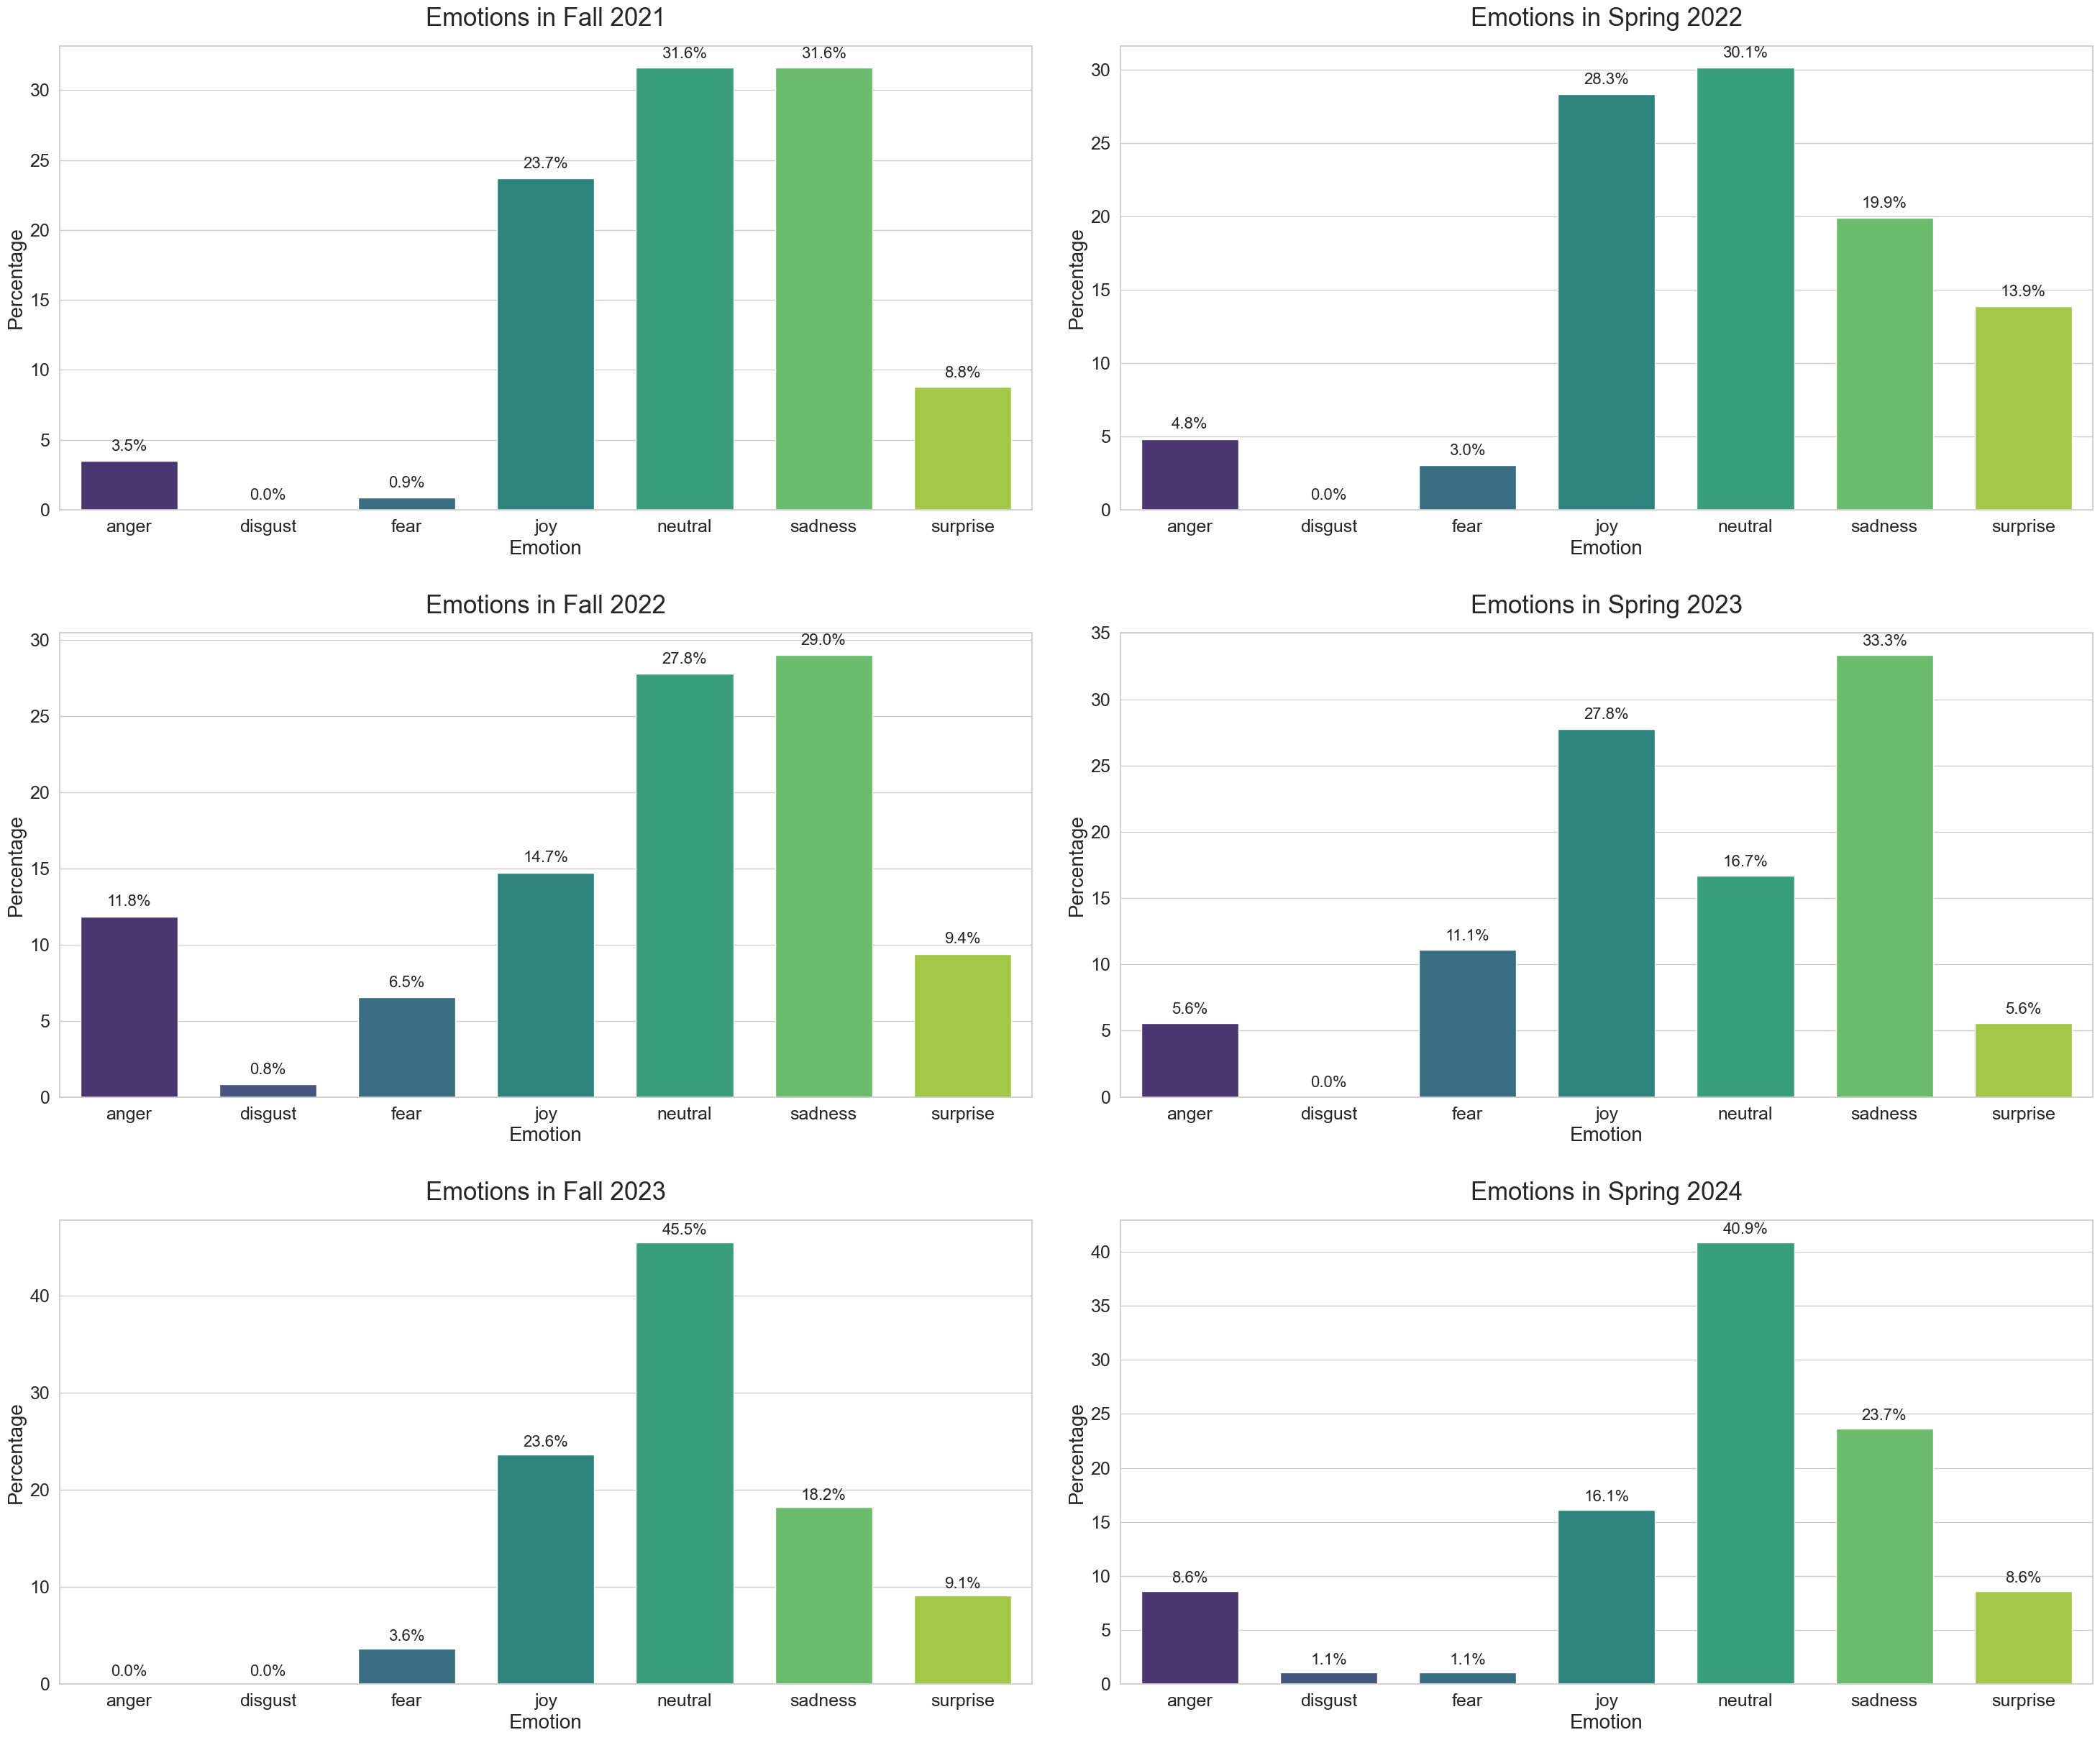

In [141]:
# display emotions by term and store in a list

terms = [term for term in merged_data['Term'].unique()]
print(f"Terms:", terms)

emotions_to_plot = ['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'surprise']
all_emotions_each_term = []

for emotion in emotions_to_plot:
    for term in terms:
        term_data = merged_data[merged_data["Term"] == term]
        total_emotion_counts = term_data["Combined_Emotion"].value_counts().values.sum()

        emotion_counts = term_data[term_data["Combined_Emotion"] == emotion].shape[0]
        emotion_percentage = (emotion_counts / total_emotion_counts) * 100
        all_emotions_each_term.append({"Term": term, "Emotion": emotion, "Emotion_Count":emotion_counts,"Total_Emotions_Count":total_emotion_counts, "Emotion_Percentage": emotion_percentage})

all_emotions_each_term = pd.DataFrame(all_emotions_each_term)
display(all_emotions_each_term)

# draw barplot of each term in terms for emotions

sns.set(style="whitegrid")
plt.figure(figsize=(30, 25))

for idx, term in enumerate(terms):

  plt.subplot(3, 2, idx + 1)
  term_data = all_emotions_each_term[all_emotions_each_term["Term"] == term]

  ax = sns.barplot(y="Emotion_Percentage", x="Emotion", data=term_data, palette="viridis", hue='Emotion', width=0.7)

    # Add percentage labels on top of each bar
  for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.,  # x-position (center of the bar)
        height + 0.5,                     # y-position (slightly above the bar)
        f'{height:.1f}%',                 # Text to display (formatted to 1 decimal place)
        ha='center',                      # Horizontal alignment: center
        va='bottom',                      # Vertical alignment: bottom
        fontsize=16
    )

  plt.title(f"Emotions in {term}", fontsize=25, pad=20)
  plt.xlabel("Emotion", fontsize=20)
  plt.ylabel("Percentage", fontsize=20)

  plt.xticks(fontsize=18)
  plt.yticks(fontsize=18)

plt.tight_layout(pad=3.0)
plt.show()

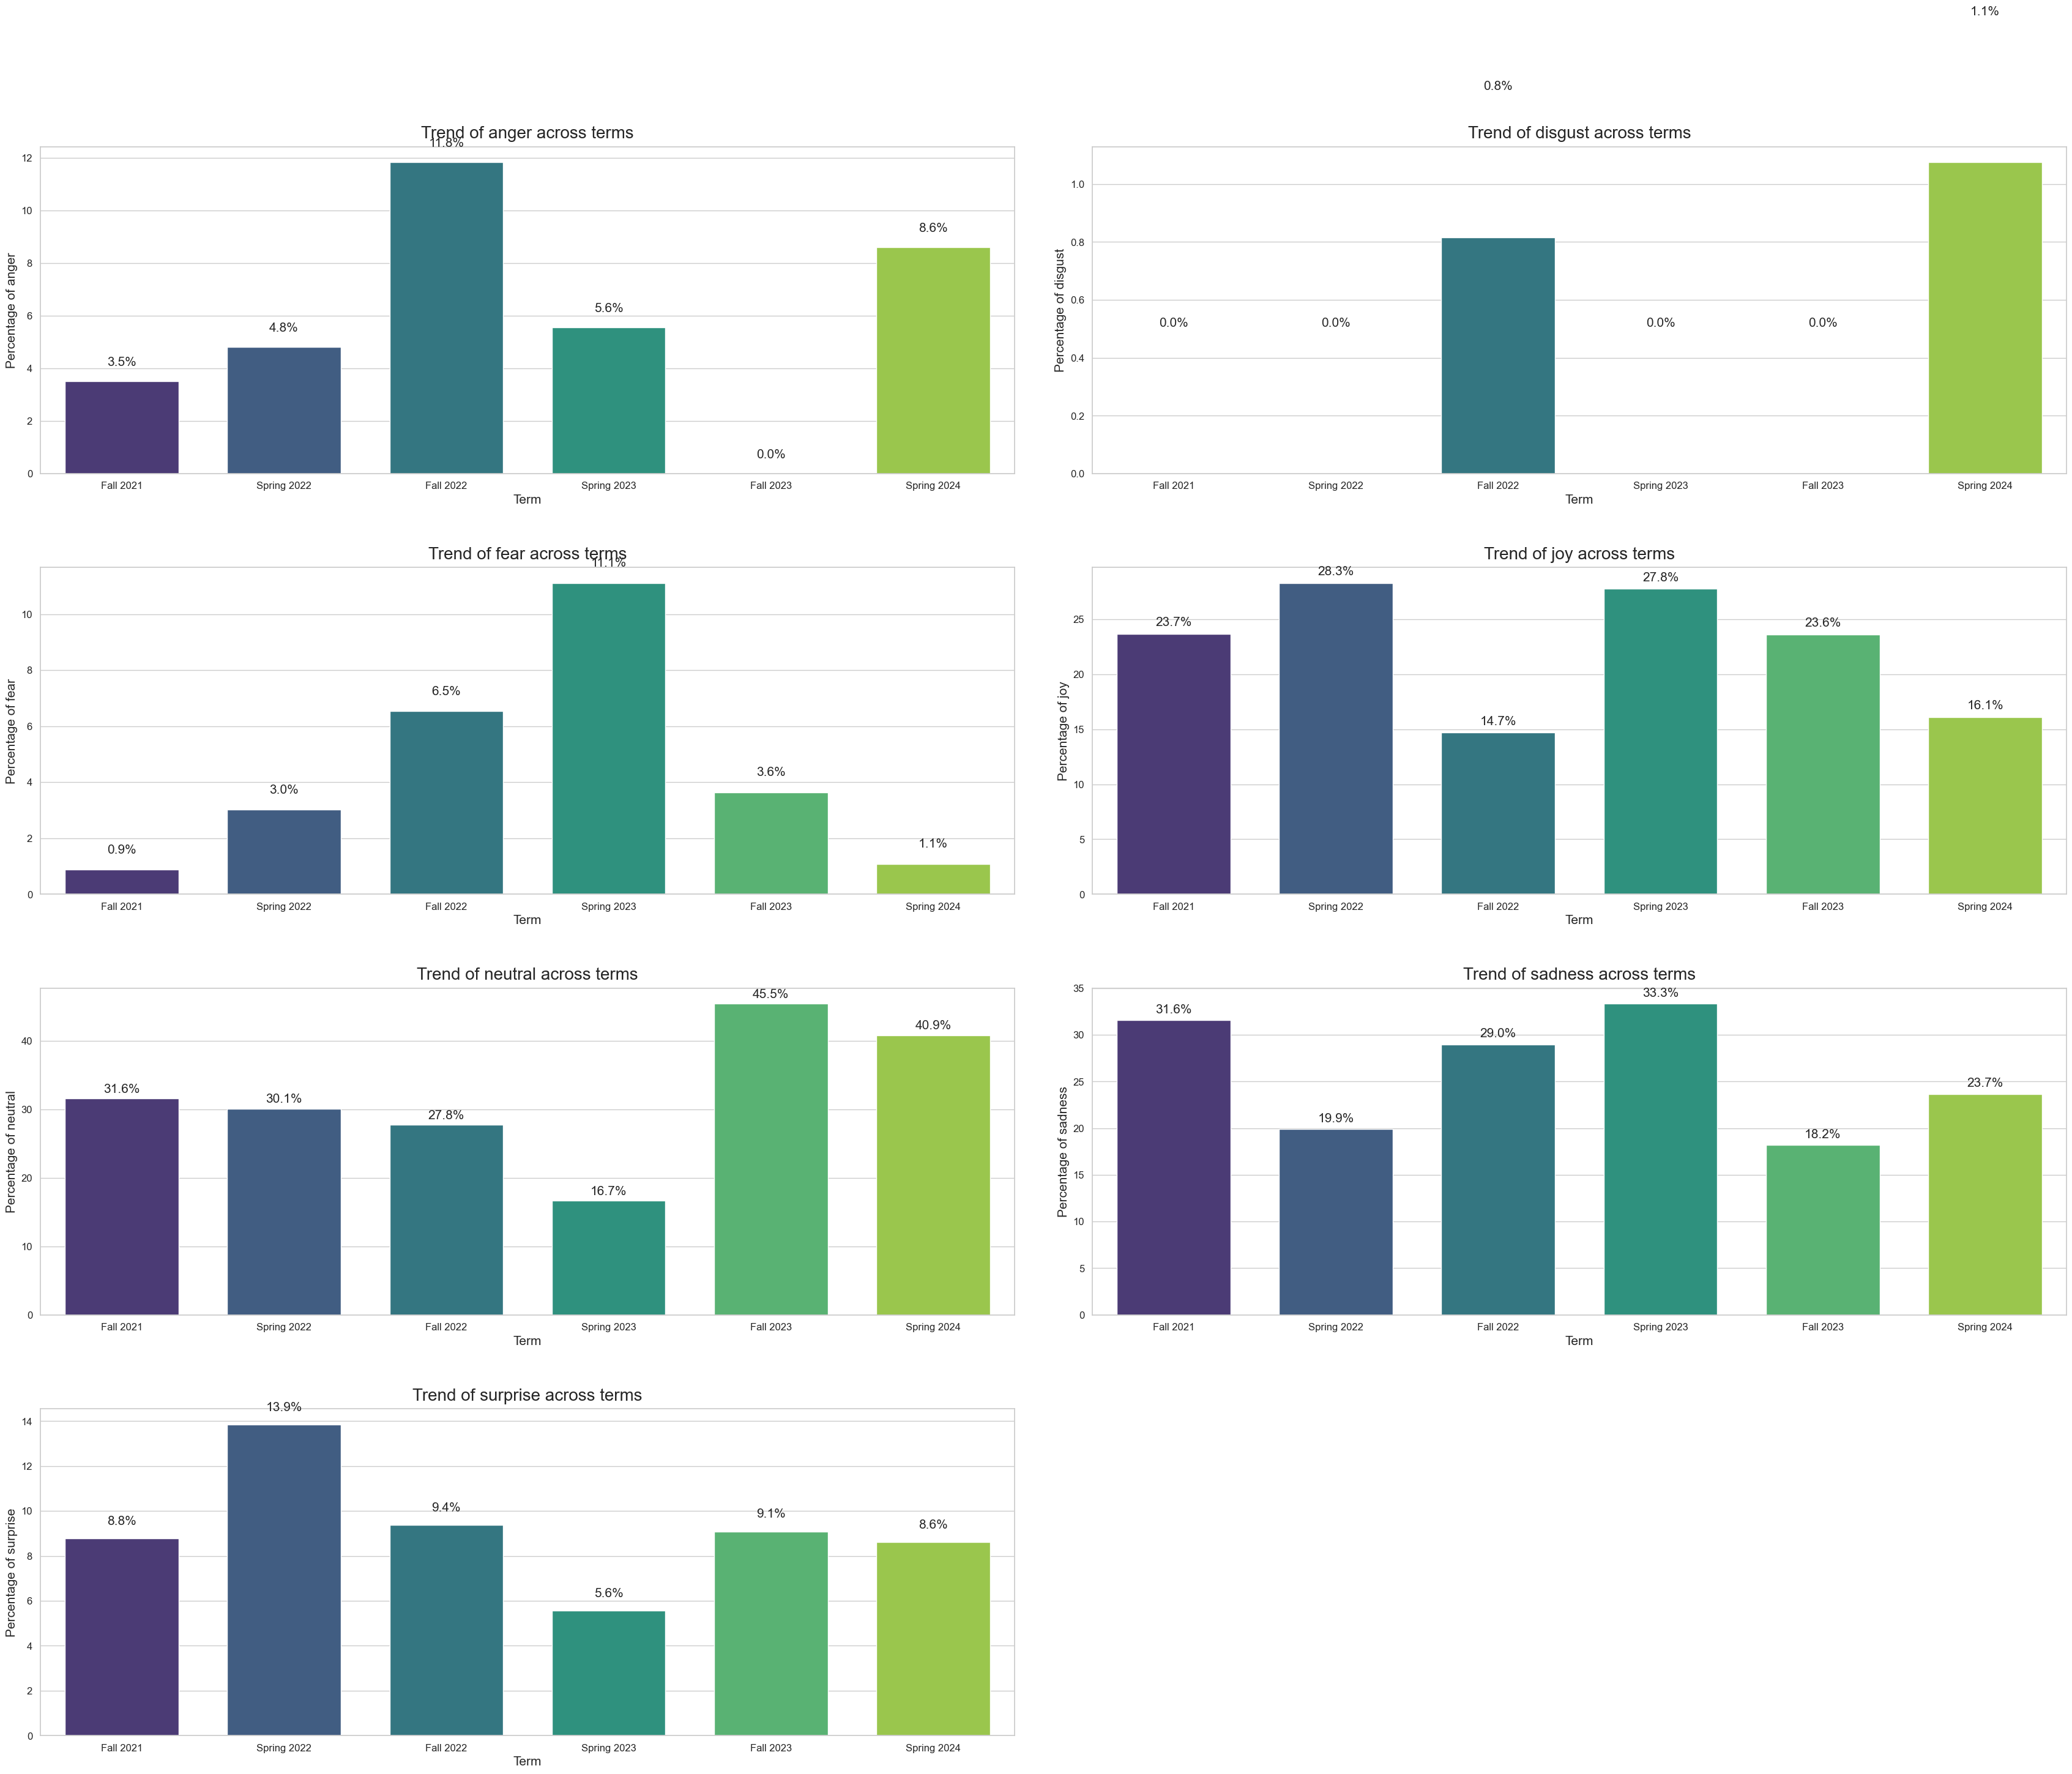

In [142]:
# plot each emotion for all terms

terms = [term for term in merged_data['Term'].unique()]
#print(f"Terms:", terms)

emotions_to_plot = ['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'surprise']
emotion_trend = []

for emotion in emotions_to_plot:
  for term in terms:
    term_data = merged_data[merged_data['Term'] == term]
    total_emotion_counts = term_data['Combined_Emotion'].value_counts().sum()

    emotion_counts = term_data[term_data['Combined_Emotion'] == emotion].shape[0]

    emotion_percentage = (emotion_counts / total_emotion_counts) * 100
    emotion_trend.append({"Term": term, "Emotion": emotion, 'Count': emotion_counts, "Emotion_Percentage": emotion_percentage})

emotion_trend = pd.DataFrame(emotion_trend)
#display(emotion_trend)

sns.set(style="whitegrid")
plt.figure(figsize=(35, 30))

for idx, emotion_to_plot in enumerate(emotions_to_plot):
  plt.subplot(4, 2, idx + 1)
  emotion_data = emotion_trend[emotion_trend['Emotion'] == emotion_to_plot]
  ax = sns.barplot(x="Term", y="Emotion_Percentage", data=emotion_data, palette="viridis", hue='Term', width=0.7, legend=False)

  # Add percentage labels on top of each bar
  for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.,  # x-position (center of the bar)
        height + 0.5,                     # y-position (slightly above the bar)
        f'{height:.1f}%',                 # Text to display (formatted to 1 decimal place)
        ha='center',                      # Horizontal alignment: center
        va='bottom',                      # Vertical alignment: bottom
        fontsize=15
    )


  plt.title(f"Trend of {emotion_to_plot} across terms", fontsize=20, pad=10)
  plt.xlabel("Term", fontsize=15)
  plt.ylabel(f"Percentage of {emotion_to_plot}", fontsize=15)
  plt.xticks(fontsize=12)
  plt.yticks(fontsize=12)

plt.tight_layout(pad=4.0)
plt.show()

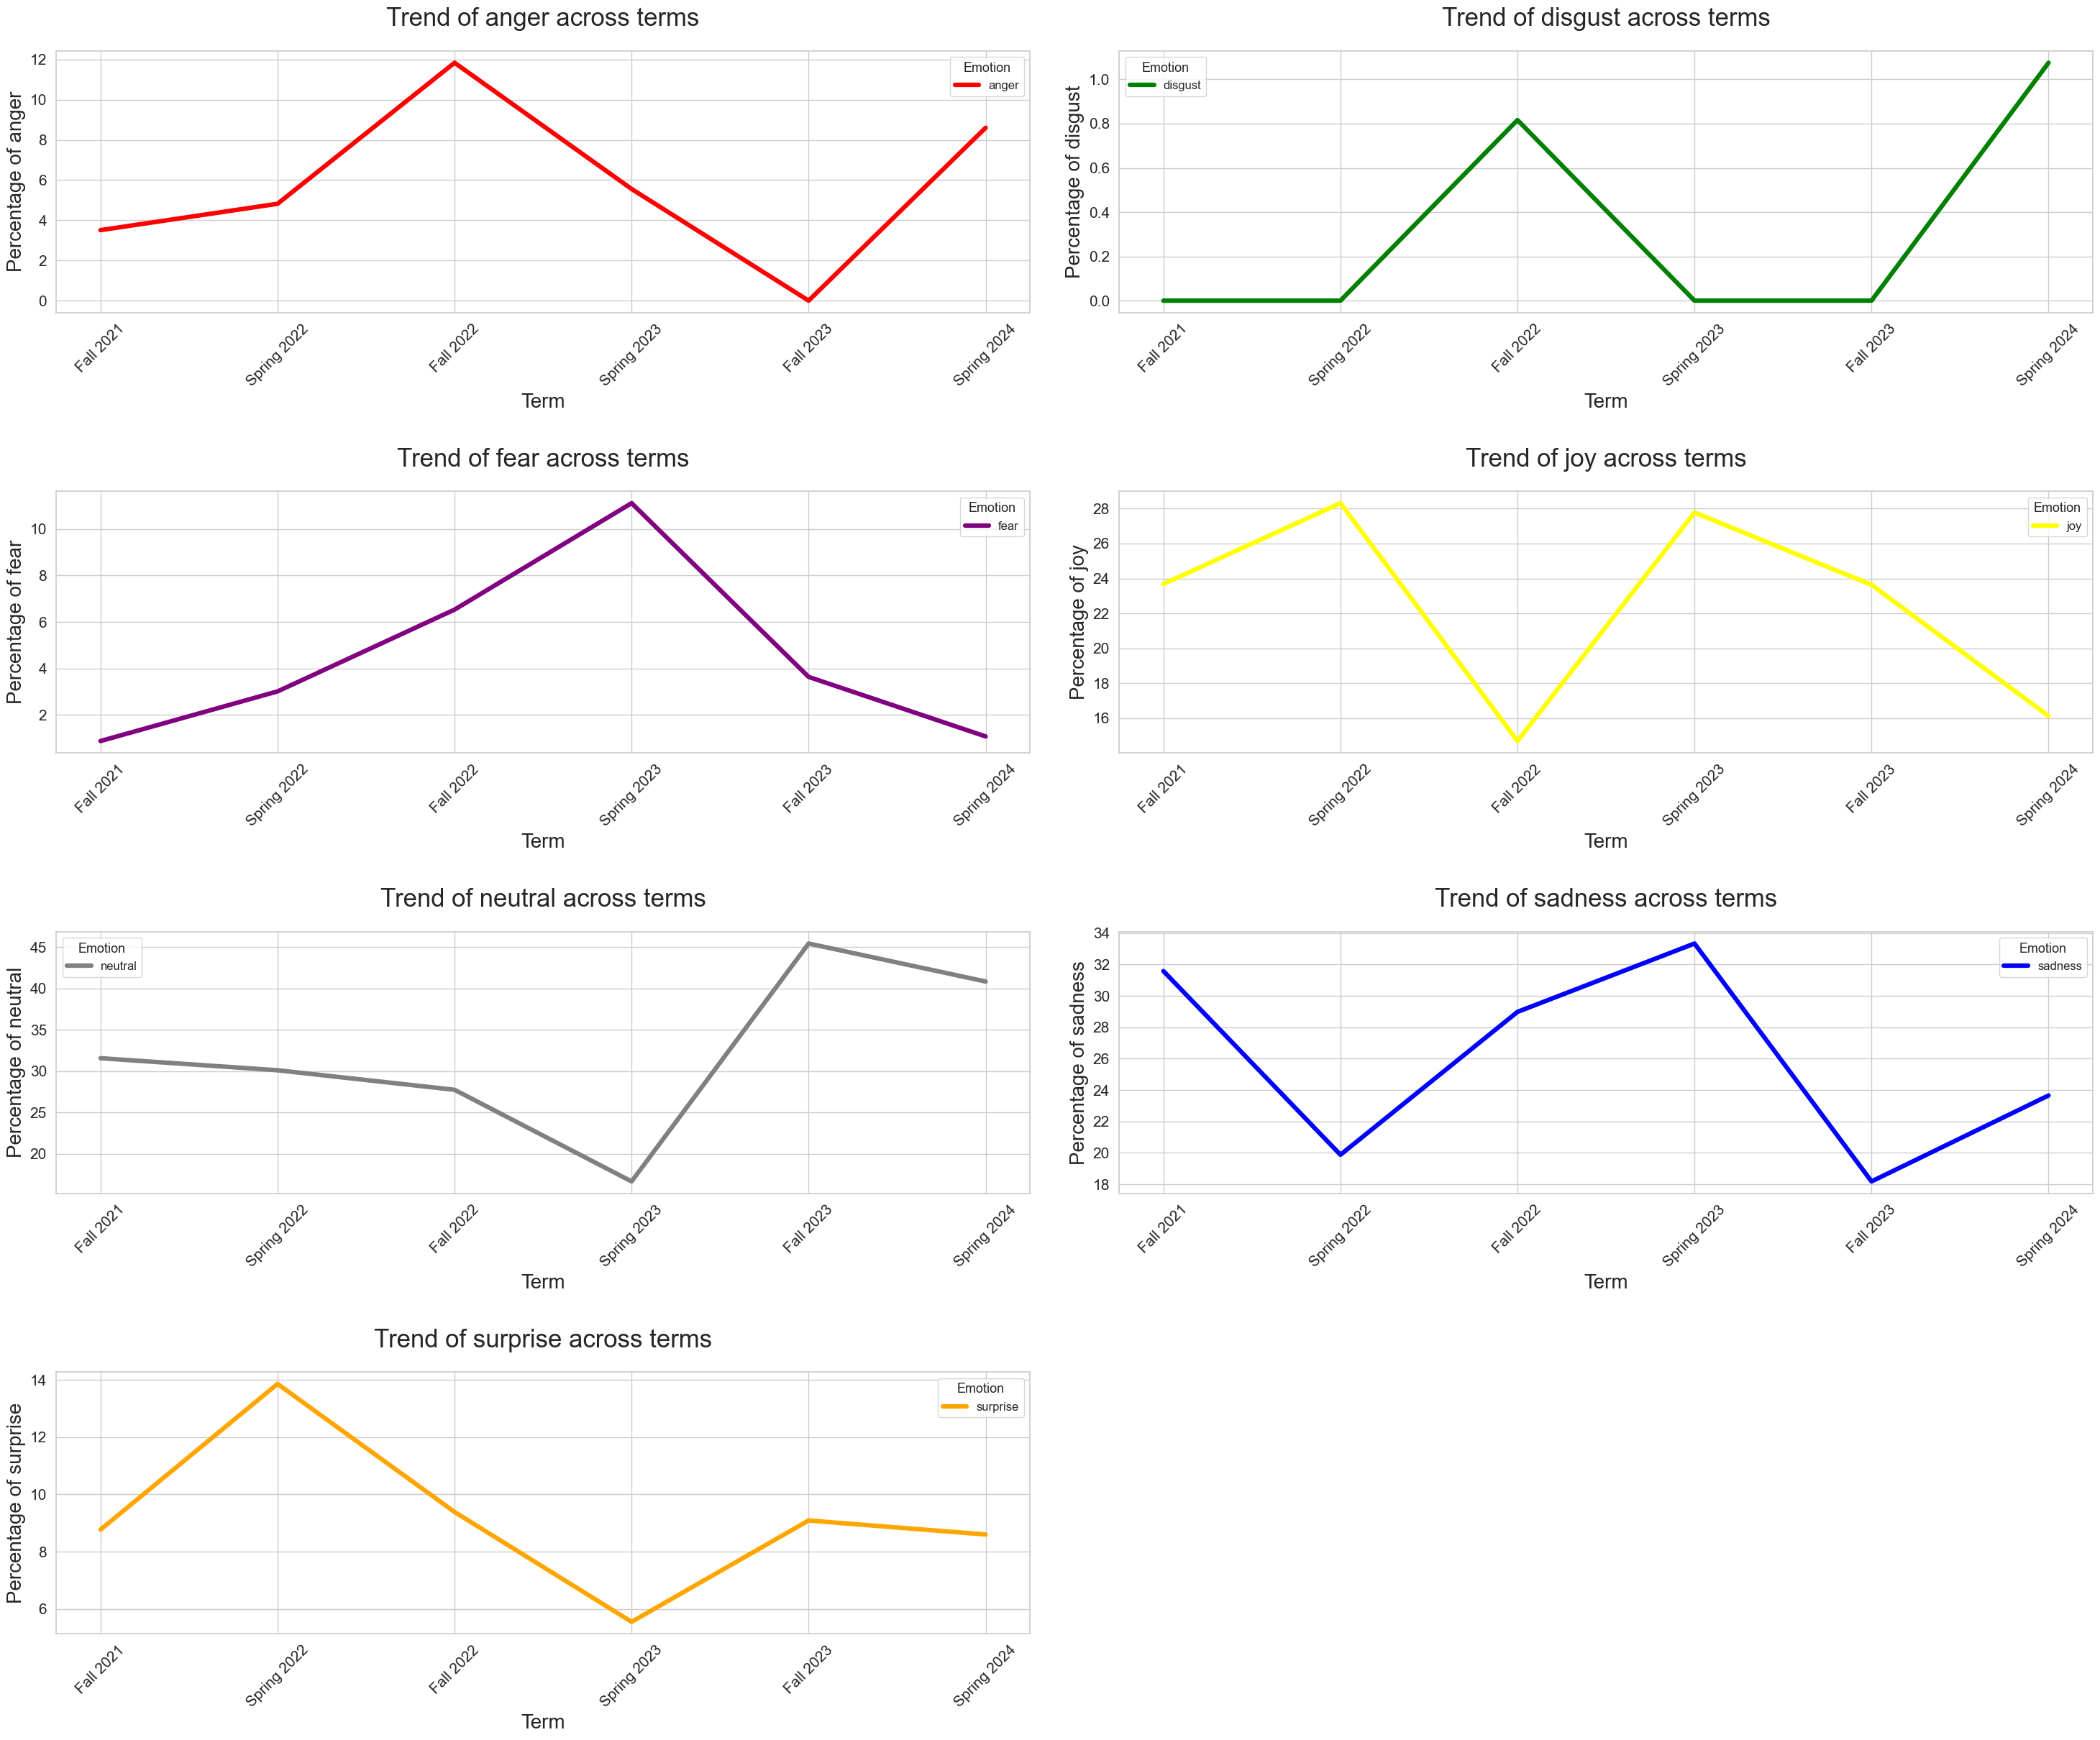

In [143]:
# plot a line chart for each emotion for all terms

terms = [term for term in merged_data['Term'].unique()]
#print(f"Terms:", terms)

emotions_to_plot = ['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'surprise']
emotion_trend = []

for emotion in emotions_to_plot:
  for term in terms:
    term_data = merged_data[merged_data['Term'] == term]
    total_emotion_counts = term_data['Combined_Emotion'].value_counts().sum()

    emotion_counts = term_data[term_data['Combined_Emotion'] == emotion].shape[0]

    emotion_percentage = (emotion_counts / total_emotion_counts) * 100
    emotion_trend.append({"Term": term, "Emotion": emotion, 'Count': emotion_counts, "Emotion_Percentage": emotion_percentage})

emotion_trend = pd.DataFrame(emotion_trend)
#display(emotion_trend)

# Define custom colors for each emotion
emotion_colors = {
    'anger': 'red',        # Bright red for anger
    'disgust': 'green',    # Green for disgust
    'fear': 'purple',      # Purple for fear
    'joy': 'yellow',       # Bright yellow for joy
    'neutral': 'gray',     # Gray for neutral
    'sadness': 'blue',     # Blue for sadness
    'surprise': 'orange'   # Orange for surprise
}

sns.set(style="whitegrid")
plt.figure(figsize=(30, 25))

for idx, emotion_to_plot in enumerate(emotions_to_plot):
  plt.subplot(4, 2, idx + 1)
  emotion_data = emotion_trend[emotion_trend['Emotion'] == emotion_to_plot]
  sns.lineplot(
                x="Term",
                y="Emotion_Percentage", 
                data=emotion_data,
                markers="o",
                palette=emotion_colors, 
                hue='Emotion',
                linewidth=4.5
                )

  # Add percentage labels on top of each bar
#   for p in ax.patches:
#     height = p.get_height()
#     ax.text(
#         p.get_x() + p.get_width() / 2.,  # x-position (center of the bar)
#         height + 0.5,                     # y-position (slightly above the bar)
#         f'{height:.1f}%',                 # Text to display (formatted to 1 decimal place)
#         ha='center',                      # Horizontal alignment: center
#         va='bottom',                      # Vertical alignment: bottom
#         fontsize=17
#     )


  plt.title(f"Trend of {emotion_to_plot} across terms", fontsize=25, pad=25)
  plt.xlabel("Term", fontsize=20)
  plt.ylabel(f"Percentage of {emotion_to_plot}", fontsize=20)
  plt.xticks(rotation=45, fontsize=15)
  plt.yticks(fontsize=15)
  plt.legend(title="Emotion", title_fontsize=13, fontsize=12, loc="best")  # Add a legend

plt.tight_layout(pad=3.0)
plt.show()

Terms: ['Spring 2024', 'Spring 2023', 'Spring 2022', 'Fall 2023', 'Fall 2022', 'Fall 2021']


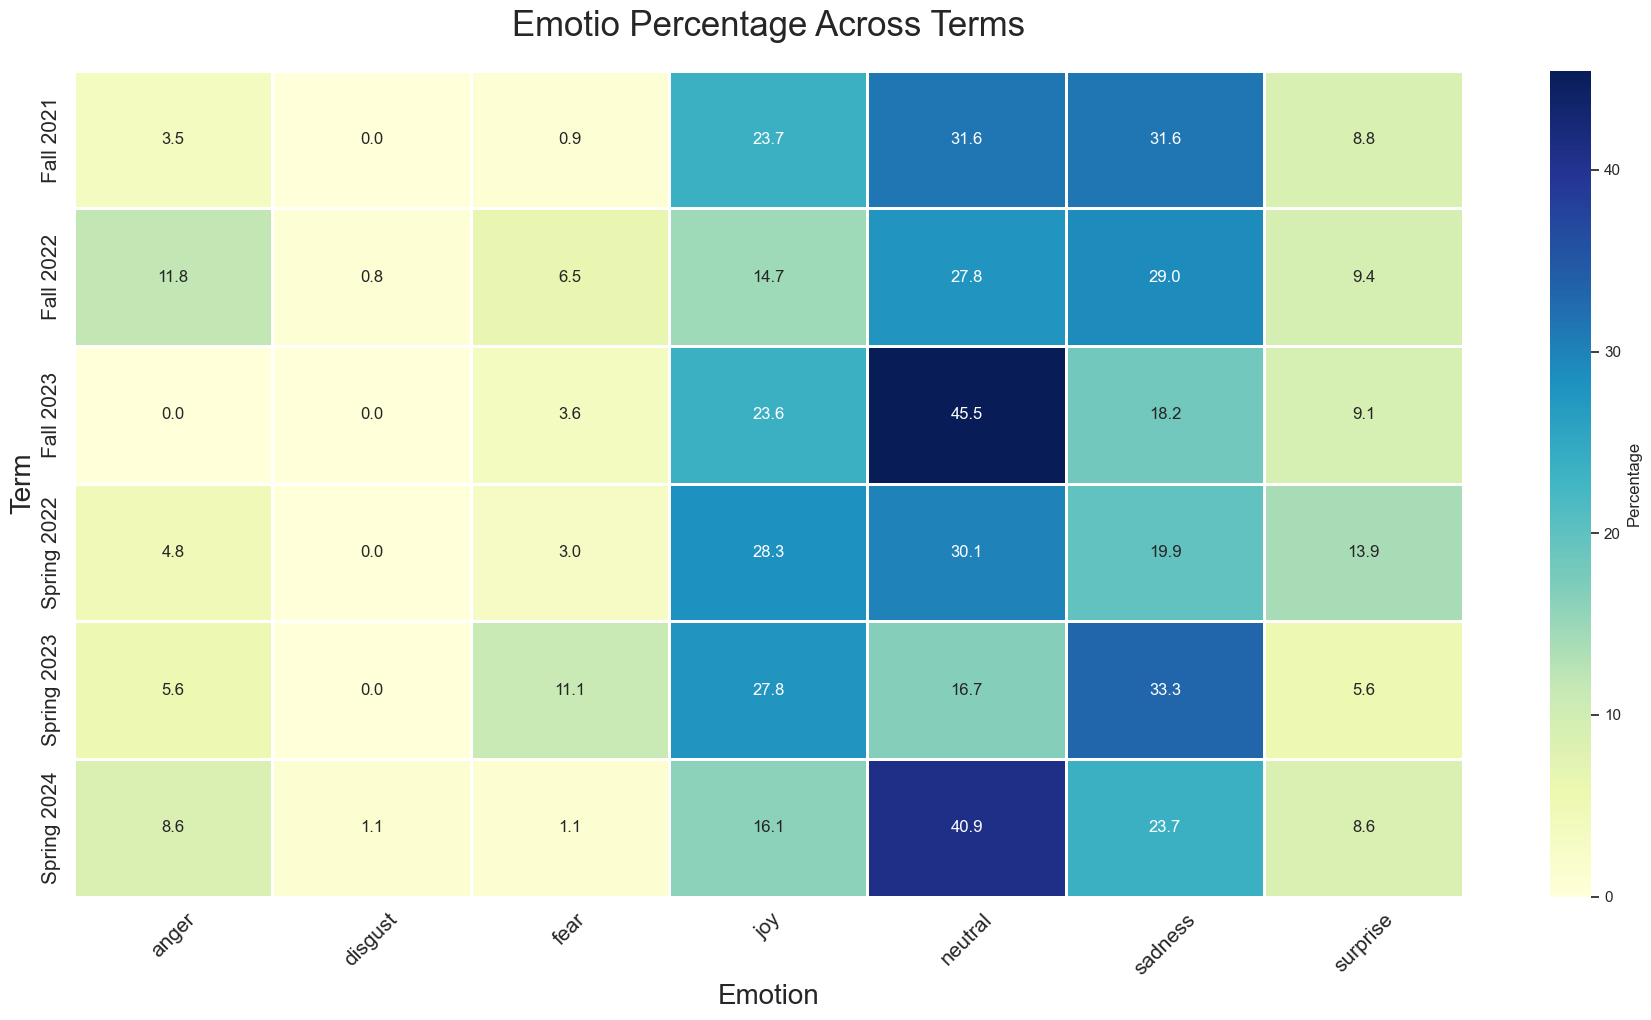

In [152]:
# plot a heatmap of each emotion for all terms

#terms = [term for term in merged_data['Term'].unique(), reverse=True]
terms = sorted(merged_data['Term'].unique(), reverse=True)
print(f"Terms:", terms)

emotions_to_plot = ['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'surprise']
emotion_trend = []

for emotion in emotions_to_plot:
  for term in terms:
    term_data = merged_data[merged_data['Term'] == term]
    total_emotion_counts = term_data['Combined_Emotion'].value_counts().sum()

    emotion_counts = term_data[term_data['Combined_Emotion'] == emotion].shape[0]

    emotion_percentage = (emotion_counts / total_emotion_counts) * 100
    emotion_trend.append({"Term": term, "Emotion": emotion, 'Count': emotion_counts, "Emotion_Percentage": emotion_percentage})

emotion_trend = pd.DataFrame(emotion_trend)
#display(emotion_trend)

# Pivot the data for heatmap plotting
heatmap_data = emotion_trend.pivot(index="Term", columns="Emotion", values="Emotion_Percentage")


sns.set(style="whitegrid")
plt.figure(figsize=(19, 11))


sns.heatmap(
          heatmap_data,
          annot=True,
          fmt=".1f",
          cmap="YlGnBu",
          linewidths=1,
          cbar_kws={'label': 'Percentage'}
          )

plt.title(f"Emotio Percentage Across Terms", fontsize=25, pad=25)
plt.xlabel("Emotion", fontsize=20)
plt.ylabel(f"Term", fontsize=20)
plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=15)

plt.tight_layout(pad=3.0)
plt.show()

Terms: ['Fall 2021', 'Spring 2022', 'Fall 2022', 'Spring 2023', 'Fall 2023', 'Spring 2024']


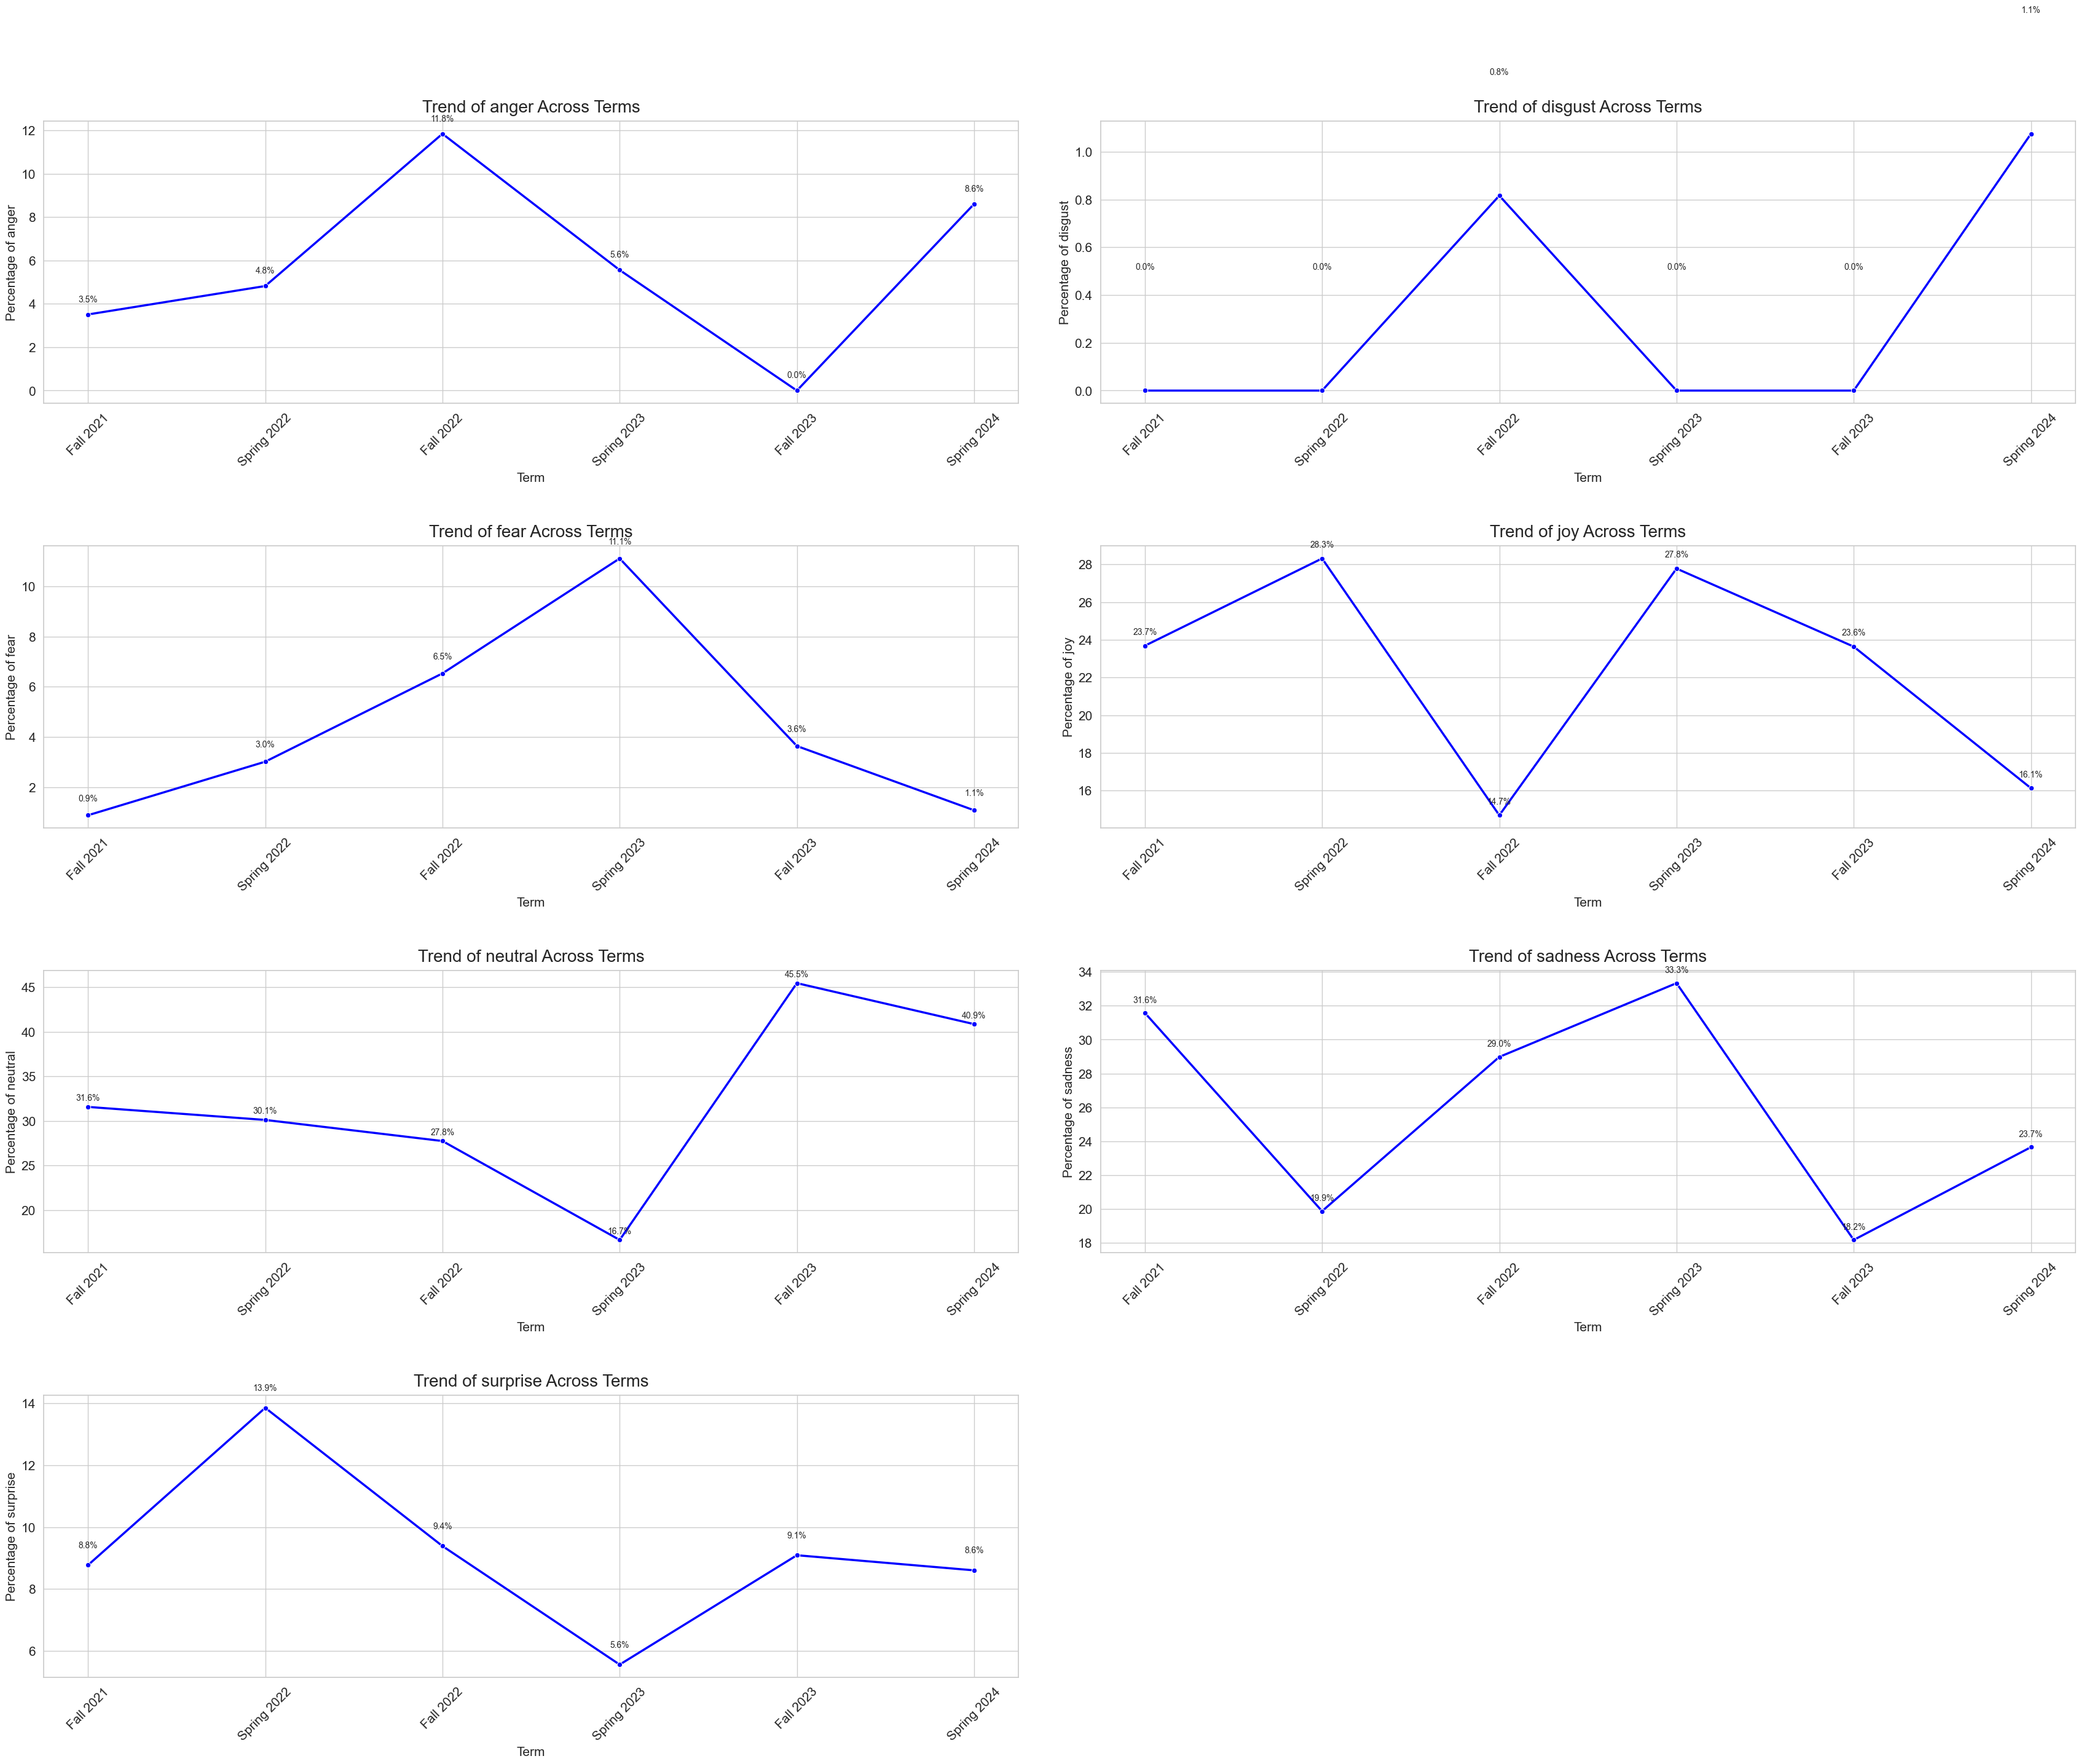

In [145]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Define terms in chronological order
terms = ['Fall 2021', 'Spring 2022', 'Fall 2022', 'Spring 2023', 'Fall 2023', 'Spring 2024']
print(f"Terms:", terms)

emotions_to_plot = ['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'surprise']
emotion_trend = []

# Calculate emotion percentages
for emotion in emotions_to_plot:
    for term in terms:
        term_data = merged_data[merged_data['Term'] == term]
        total_emotion_counts = term_data['Combined_Emotion'].value_counts().sum()
        
        emotion_counts = term_data[term_data['Combined_Emotion'] == emotion].shape[0]
        emotion_percentage = (emotion_counts / total_emotion_counts) * 100 if total_emotion_counts > 0 else 0
        emotion_trend.append({
            "Term": term, 
            "Emotion": emotion, 
            'Count': emotion_counts, 
            "Emotion_Percentage": emotion_percentage
        })

emotion_trend = pd.DataFrame(emotion_trend)

# Set seaborn style
sns.set(style="whitegrid")
plt.figure(figsize=(35, 30))

# Create line plots for each emotion
for idx, emotion_to_plot in enumerate(emotions_to_plot):
    plt.subplot(4, 2, idx + 1)
    emotion_data = emotion_trend[emotion_trend['Emotion'] == emotion_to_plot]
    
    # Create line plot
    ax = sns.lineplot(
        x="Term",
        y="Emotion_Percentage",
        data=emotion_data,
        marker="o",  # Add markers at data points
        linewidth=2.5,
        color="blue"  # Single color for clarity
    )
    
    # Add percentage labels at each point
    for i, point in emotion_data.iterrows():
        ax.text(
            point['Term'],
            point['Emotion_Percentage'] + 0.5,
            f"{point['Emotion_Percentage']:.1f}%",
            ha='center',
            va='bottom',
            fontsize=10
        )
    
    plt.title(f"Trend of {emotion_to_plot} Across Terms", fontsize=20, pad=10)
    plt.xlabel("Term", fontsize=15)
    plt.ylabel(f"Percentage of {emotion_to_plot}", fontsize=15)
    plt.xticks(rotation=45, fontsize=15)  # Rotate x-labels for readability
    plt.yticks(fontsize=15)

plt.tight_layout(pad=4.0)
plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming the previous code has been executed up to creating the heatmap
# terms, emotion_trend, and heatmap_data are already defined

# Step 1: Calculate differences between successive terms for each emotion
emotion_diff = []

# Sort terms to ensure chronological order for differences
terms = sorted(merged_data['Term'].unique())  # Remove reverse=True to get chronological order
print(f"Chronological Terms:", terms)

# Loop through each emotion
for emotion in emotions_to_plot:
    emotion_data = emotion_trend['Emotion'] == emotion
    
    # Calculate differences between successive terms
    differences = emotion_data['Emotion_Percentage'].diff().fillna(0)  # First difference will be NaN, fill with 0
    emotion_data['Difference'] = differences
    
    # Compute moving average of differences (window size = 2 for simplicity)
    emotion_data['Moving_Average_Diff'] = emotion_data['Difference'].rolling(window=2, min_periods=1).mean()
    
    # Store results
    for idx, term in enumerate(emotion_data['Term']):
        emotion_diff.append({
            'Term': term,
            'Emotion': emotion,
            'Difference': emotion_data['Difference'].iloc[idx],
            'Moving_Average_Diff': emotion_data['Moving_Average_Diff'].iloc[idx]
        })

# Convert to DataFrame
emotion_diff = pd.DataFrame(emotion_diff)
display(emotion_diff)

# Step 2: Plot the moving average line chart
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))

# Plot a line for each emotion
for emotion in emotions_to_plot:
    emotion_data = emotion_diff[emotion_diff['Emotion'] == emotion]
    sns.lineplot(x='Term', y='Moving_Average_Diff', data=emotion_data, label=emotion, marker='o')

plt.title("Moving Average of Differences in Emotion Percentages Across Terms", fontsize=16, pad=20)
plt.xlabel("Term", fontsize=14)
plt.ylabel("Moving Average of Differences (%)", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="Emotion", fontsize=12, title_fontsize=14)
plt.grid(True)

plt.tight_layout(pad=3.0)
plt.show()

Chronological Terms: ['Fall 2021', 'Fall 2022', 'Fall 2023', 'Spring 2022', 'Spring 2023', 'Spring 2024']


KeyError: 'Emotion_Percentage'